# ¡Llena ese carrito!

## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

In [38]:
# importar librerías
import pandas as pd #importamos pandas para los análisis
from matplotlib import pyplot as plt #importamos pyplot para crear gráficos
import numpy as np #importamos numpy para computación científica

In [39]:
# leer conjuntos de datos en los DataFrames, agregamos el argumento sep=';' 
# para especificar el separador y dividir las columnas correctamente.
orders = pd.read_csv('instacart_orders.csv', sep = ';')
products = pd.read_csv('products.csv', sep = ';')
order_products = pd.read_csv('order_products.csv', sep = ';')
aisles = pd.read_csv('aisles.csv', sep = ';')
departments = pd.read_csv('departments.csv', sep = ';')

In [40]:
# mostrar información del DataFrame y primeras filas para mayor legibilidad
orders.info(show_counts=True)
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [41]:
# mostrar información del DataFrame
products.info(show_counts=True)
products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [42]:
# mostrar información del DataFrame
order_products.info(show_counts=True)
order_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [43]:
# mostrar información del DataFrame
aisles.info(show_counts=True)
aisles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [44]:
# mostrar información del DataFrame
departments.info(show_counts=True)
departments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


## Conclusiones

Se necesitó procesar los datos de todos los DataFrames para mayor legibilidad ya que inicialmente al estar separados por ';' se distinguian unicamente por tipo object, ahora ya se dividieron en columnas por el argumento sep='', lo que hizo que el tipo de datos cambiaran entre int64, float y object según era el caso. Requeriremos cambiar el tipo de datos de la columna orders_days_since_prior de 'orders' al igual que el tipo de datos departments_add_to_cart_order de 'departments' ya que ambos son flotantes y al ser número de ordenes pueden ser enteros.
Requeriremos eliminar valores ausentes y duplicados.




## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [45]:
# Revisa si hay pedidos duplicados, revisaremos en instacar_orders si hay pedidos duplicados con la funcion nunique 
#que devolverá el número de valores unicos. Sabemos que tenemos 478967 entradas.
print(orders.nunique()) 


order_id                  478952
user_id                   157437
order_number                 100
order_dow                      7
order_hour_of_day             24
days_since_prior_order        31
dtype: int64


Encontramos que hay 15 filas duplicadas. Al tener 478967 filas en total y 478952 filas unicas

In [46]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
### utilizaremos filtros que cumplan con ambas condiciones en un nuevo data frame
filter_day_hour = orders[(orders['order_dow']== 3) & (orders['order_hour_of_day']==2)]

                         
                         
filter_day_hour.shape



(121, 6)

Nos encontramos con un nuevo data frame que contiene las filas que cumplen la condición, utilizando .shape obtenemos que son 121 filas.

In [47]:
# Elimina los pedidos duplicados
## Creamos un nuevo data frame eliminando las filas duplicadas
orders = orders.drop_duplicates()

In [48]:
# Vuelve a verificar si hay filas duplicadas
orders.duplicated().sum()

0

In [49]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
orders['order_id'].duplicated().sum()

0

Se detectaron 15 filas duplicadas de pedidos realizados el miércoles a las 2am, se procedió a eliminar los datos duplicados con el método drop.duplicates y después se corroboró si existian más con duplicated().sum() asegurándonos de que no hubiesen más filas repetidas. Igualmente se verificó con los Id de pedidos.

### `products` data frame

In [50]:
# Verifica si hay filas totalmente duplicadas
products.duplicated().sum()

0

In [51]:
# Revisa únicamente si hay ID de departamentos duplicados
print(products['department_id'].duplicated().sum()) 

## Verificamos los valores únicos ya que existen demasiados id de departamentos duplicados
products['department_id'].unique()

49673


array([19, 13,  7,  1, 11, 16, 17, 18, 12,  9,  8, 14, 15,  4, 21,  6, 20,
        5,  3,  2, 10], dtype=int64)

In [52]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
#primero convertimos nuestros datos a muyúsculas
products['product_name'] = products['product_name'].str.upper()
#contamos los valores duplicados y rectificamos considerando los valores unicos
print(products['product_name'].duplicated().sum()) 
products['product_name'].nunique()

1361


48332

In [53]:
# Revisa si hay nombres duplicados de productos no faltantes
products[products["product_name"].notna()].duplicated().sum()


0

Se utilizó el método duplicated para verificar si tenemos valores duplicados en nuestras tablas. En el caso de nombres de productos se requirió corregir los nombres antes de verificar los duplicados. No hay filas completamente duplicadas, pero si existen muchas con nombres duplicados; esto puede deberse a fallos en el sistema o que se han ingresado los datos de manera repetida en la aplicación, lo que puede provocar que al procesar los datos los resultados estén alterados y no sean representativos. De los datos duplicados se encuentran 104 valores ausentes, que también pueden afectar la visualización completa de los resultados. Antes de continuar con la visualización de datos mediante gráficos, es importante filtrar los valores que si son representativos en el análisis.

### `departments` data frame

In [54]:
# Revisa si hay filas totalmente duplicadas
departments.duplicated().sum()

0

In [55]:
# Revisa únicamente si hay IDs duplicadas de productos
print(departments['department_id'].duplicated().sum())

0


No hay valores duplicados en esta tabla

### `aisles` data frame

In [56]:
# Revisa si hay filas totalmente duplicadas
aisles.duplicated().sum()

0

In [57]:
# Revisa únicamente si hay IDs duplicadas de productos
print(aisles['aisle_id'].duplicated().sum())

0


No hay filas ni id duplicados.

### `order_products` data frame

In [58]:
# Revisa si hay filas totalmente duplicadas
order_products[['product_id', 'order_id']].duplicated().sum()

0

In [59]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso

order_products[['product_id', 'order_id']].nunique()

product_id     45573
order_id      450046
dtype: int64

Nos encontramos sin valores duplicados en nuestras columnas de interés, pero detectamos que hay menos valores unicos en la columna products_id que en orders_id. 

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [60]:
# Encuentra los valores ausentes en la columna 'product_name'
print(products[products['product_name'].isna()])

#contamos los valores ausentes
products['product_name'].isnull().sum()


       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


1258

Los productos que no tienen nombre se encuentran en la isla con id 100 y el departamento 21. Hay 1258 valores ausentes.

In [61]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
# mostramos los valores unicos de la columna aisle_id para verificar si 100 se repite la misma cantidad de veces que los valores ausentes.
products['aisle_id'].value_counts()

aisle_id
100    1258
45     1246
37     1091
47     1038
120    1026
       ... 
113      47
82       44
32       32
68       26
18       12
Name: count, Length: 134, dtype: int64

La cantidad de valores ausentes corresponde a la misma cantidad de veces que se menciona la isla 100.

In [62]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
# utilizaremos el mismo metodo de value counts para encontrar las veces que vemos al departamento 21
products['department_id'].value_counts()


department_id
11    6564
19    6264
13    5372
7     4366
1     4008
16    3449
17    3085
15    2092
9     1858
4     1684
3     1516
20    1322
21    1258
6     1139
14    1117
18    1081
5     1054
8      972
12     907
2      548
10      38
Name: count, dtype: int64

Nos encontramos con 1258 repeticiones del pasillo 100, el departemento 21 y es la misma cantidad de veces que tenemos valores ausentes. Por lo que podemos deducir que los valores ausentes comparten esas caracteristicas.

In [63]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(aisles[(aisles['aisle_id']==100)])
print(departments[(departments['department_id']==21)])

    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


Nos encontramos con que hay información faltante en el aisle_id 100 y el department_id 21.

In [64]:
# Completa los nombres de productos ausentes con 'Unknown'
#utilizaremos el metodo fillna, posteriormente revisaremos los valores ausentes nuevamente
products['product_name'] = products['product_name'].fillna('Unknown')
print(products.isna().sum())

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


Comprobamos que en la tabla de productos ya no hay mas valores ausentes.

### `orders` data frame

In [65]:
# Encuentra los valores ausentes
orders.isnull().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [66]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print(orders[(orders['order_number']!=1)].isnull().sum())


order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


Nos encontramos con que los valores ausentes se encuentran en los días desde que hizo la primer compra, al ser realizado el pedido por primera vez es lógico que no exista un día antes que la primera compra. Si aplicamos ahora un filtro para excluir a las primeras compras de los usuarios, nos encontraremos con que ya no hay valores ausentes.

In [67]:
### Adicional, sustituir valores ausentes por 0
orders['days_since_prior_order']=orders['days_since_prior_order'].fillna(0)
print(orders.isna().sum())

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


### `order_products` data frame

In [68]:
# Encuentra los valores ausentes
#los datos de order_products se encuentran en departments (?)
order_products.isnull().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [69]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(order_products['add_to_cart_order'].max())
print(order_products['add_to_cart_order'].min())

64.0
1.0


Los valores ausentes se encuentran en la columna add_to_cart_order

In [70]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
#filtramos los valores ausentes de la columna y los guardamos en una nueva variables.
id_add_null = order_products[order_products['add_to_cart_order'].isnull()]
print(id_add_null.head())

       order_id  product_id  add_to_cart_order  reordered
737     2449164        5068                NaN          0
9926    1968313       43867                NaN          0
14394   2926893       11688                NaN          0
16418   1717990        4142                NaN          0
30114   1959075       42828                NaN          1


In [71]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos? #El valor máximo es 64, así que no sería posible.
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
grp = id_add_null.groupby(['order_id'])
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
print(grp['product_id'].count())

order_id
9310        1
61355      63
102236     31
129627      5
165801      6
           ..
2999801     6
3125735    22
3308010    51
3347453     7
3383594     5
Name: product_id, Length: 70, dtype: int64


Los datos ausentes se presentan en add_to_cart, se dedujo que tendría que ver con las cantidades de productos pero aparentemente no hay relación, ya que algunas de las ordenes no repiten productos en la orden al contarse por el metodo groupby.


In [72]:
# Remplaza los valores ausentes en la columna 'add_to_cart' con 999 y convierte la columna al tipo entero.
#reemplazamos valores ausentes
order_products['add_to_cart_order']= order_products['add_to_cart_order'].fillna(999)
#convertimos a enteros
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)
#comprobamos los cambios
order_products.isnull().sum()



order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

Al sustituir los valores ausentes con 999, nos encontramos con todos los valores completos.

## Conclusiones

Se requiere verificar los datos, su orden y el acomodo antes de iniciar un análisis. Para eso es importante verificar si hay datos ausentes, que características comparten los mismos, y la manera en la que se deben tratar, ya sea eliminarlos o sustituirlos. Lo mismo aplica para los datos duplicados.


### [A1] Verifica que los valores sean sensibles

In [73]:
#utilizaremos la función describe para conocer el mínimo y máximo de order_hour_of_day
orders['order_hour_of_day'].describe()

count    478952.000000
mean         13.447034
std           4.224567
min           0.000000
25%          10.000000
50%          13.000000
75%          16.000000
max          23.000000
Name: order_hour_of_day, dtype: float64

In [74]:
orders['order_dow'].describe()

count    478952.000000
mean          2.775051
std           2.045901
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: order_dow, dtype: float64

Los valores mínimos y máximos de horas del día y día de pedido son 0 a 23 y 0 a 6 respectivamente.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

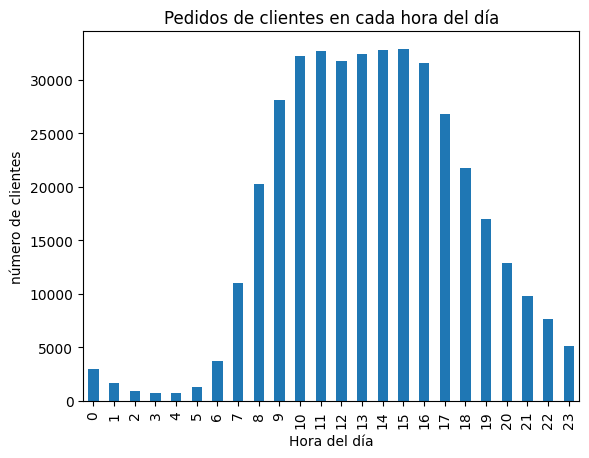

In [75]:
#agruparemos por la frecuencia de pedidos de los clientes en cada hora del día 
order_per_hour= orders.groupby('order_hour_of_day')['user_id'].nunique()
#Haremos un grafico de barras para visualizar
order_per_hour.plot(x='order_hour_of_day', y='user_id', kind='bar', xlabel='Hora del día', ylabel='número de clientes', title= 'Pedidos de clientes en cada hora del día')
plt.show()

Entre 8am y 7pm es cuando más pedidos realizan los clientes.

### [A3] ¿Qué día de la semana compran víveres las personas?

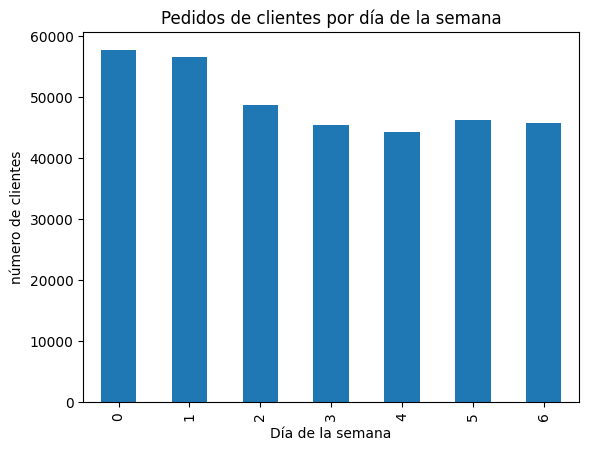

In [76]:
#agrupamos los datos de la misma manera que el segmento anterior, pero ahora con los días de la semana
order_per_day= orders.groupby('order_dow')['user_id'].nunique()
order_per_day.plot(x='order_dow', y='user_id', kind='bar', xlabel='Día de la semana', ylabel='número de clientes', title='Pedidos de clientes por día de la semana')
plt.show()

Entre domingos y lunes se registran más pedidos de las personas.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

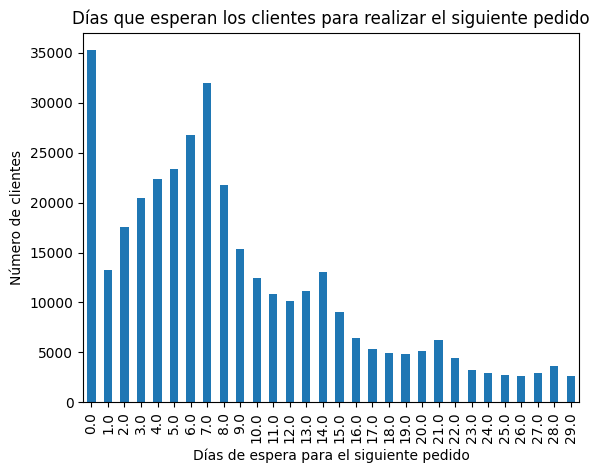

In [77]:
# Filtrar los datos para excluir valores mayores a 30
filtered_orders = orders[orders['days_since_prior_order'] < 30]

# Agrupar por 'days_since_prior_order' y contar usuarios únicos. Con esto obtienes cuanto a pasado cada usuario desde su última compra, y lo agrupas por numero de dias.
time_next_buy = filtered_orders.groupby('days_since_prior_order')['user_id'].nunique()

# Crear el gráfico de barras
time_next_buy.plot(kind='bar',
    xlabel='Días de espera para el siguiente pedido',
    ylabel='Número de clientes',
    title='Días que esperan los clientes para realizar el siguiente pedido')

# Mostrar el gráfico
plt.show()


Las personas suelen hacer su siguiente compra en los primeros días siguientes de su primera compra, habiendo una alza a los 30 días. Ignoraremos las compras realizadas en el día 0 ya que esas representan la primera compra realizada.

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [79]:
#creamos una tabla para visualizar los datos que queremos graficar.
orders.pivot_table(index='order_hour_of_day', columns='order_dow', values='order_id', aggfunc='count')[[3,6]]



order_dow,3,6
order_hour_of_day,,
0,373,464
1,215,254
2,106,177
3,101,125
4,108,118
5,170,161
6,643,451
7,1732,1619
8,3125,3246


In [80]:
#El comportamiento es similar en ambos días, sin embargo hay mayor cantidad de compras los miércoles entre 6am y 10am, 
#mientras que los sábados hay más compras a partir de las 11am hasta las 3am.

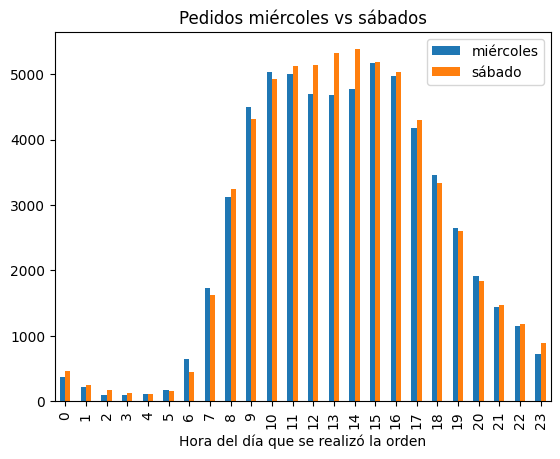

In [81]:
orders.pivot_table(index='order_hour_of_day', columns='order_dow', values='order_id', aggfunc='count')[[3,6]].plot(kind='bar', xlabel='Hora del día que se realizó la orden', title='Pedidos miércoles vs sábados')
plt.legend(['miércoles','sábado'])
plt.show()

La actividad de compra de los clientes es muy similar entre los miércoles y sábados, los clientes suelen hacer entre 1 y 5 compras mayormente, el número de clientes que hacen más pedidos disminuyen. Y los productos más vendidos son los orgánicos, principalmente las frutas y verduras.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [82]:
#Primero revisaremos los valores máximos y mínimos de nuestros datos
orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,4.789520e+05,478952.000000,478952.000000,478952.000000,478952.000000,478952.000000
mean,1.709953e+06,102966.654911,17.157563,2.775051,13.447034,10.433853
std,9.869537e+05,59525.292863,17.704457,2.045901,4.224567,9.292153
min,4.000000e+00,2.000000,1.000000,0.000000,0.000000,0.000000
25%,8.564698e+05,51413.750000,5.000000,1.000000,10.000000,4.000000
50%,1.709521e+06,102633.000000,11.000000,3.000000,13.000000,7.000000
75%,2.563002e+06,154419.000000,23.000000,5.000000,16.000000,15.000000
max,3.421079e+06,206209.000000,100.000000,6.000000,23.000000,30.000000


In [83]:
#Creamos una tabla para verificar la frecuencia con la que se realiza cierta cantidad de pedidos.
order_per_client= orders.groupby('order_number')['user_id'].nunique()
orders.pivot_table(index='order_number', values='user_id', aggfunc='count').head(10)

,user_id
order_number,
1,28817
2,28633
3,28685
4,28703
5,25661
6,22821
7,20586
8,18556
9,16905


<Axes: xlabel='número de ordenes', ylabel='número de clientes'>

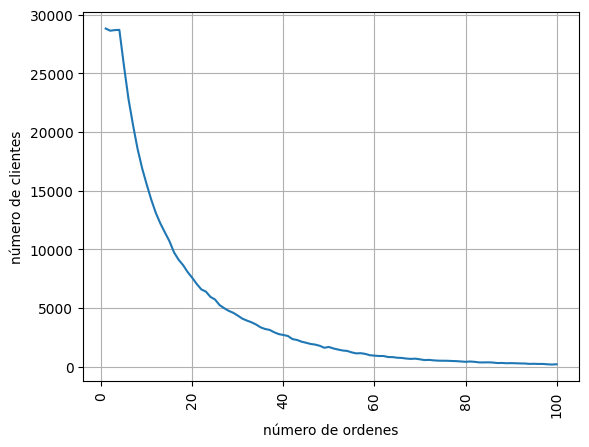

In [84]:
#Numero de ordenes por cada cliente

order_per_client.plot(x='order_number', y='user_id', xlabel='número de ordenes', ylabel='número de clientes', grid=10, rot=90)

Hay un descenso entre el número de clientes que hacen más ordenes conforme sube el número de pedidos. Es decir que la mayoría de clientes hace de 1 a 5 ordenes y los clientes que van ordenando menos tienen un decrecimiento gradual.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [85]:
#Productos con más frecuencia
# Uniremos dos tablas como una nueva, nos interesa compaginar los datos de product_id que se relacionan con order_id de 
# order_products para saber en cuantos pedidos se solicitó un producto, y los uniremos con products_name de la tabla products
# con relación al product_id
products_descrip = order_products.merge(products, on='product_id')

# mostraremos la tabla pivot para posteriormente graficarla
products_descrip.pivot_table(index='product_name', values='product_id', aggfunc='count')

,product_id
product_name,
#2 COFFEE FILTERS,110
#2 CONE WHITE COFFEE FILTERS,2
#2 MECHANICAL PENCILS,3
#4 NATURAL BROWN COFFEE FILTERS,39
& GO! HAZELNUT SPREAD + PRETZEL STICKS,15
...,...
"\""DARN GOOD\"" CHILI MIX",5
"\""IM PEI-NUT BUTTER\"" DOUBLE CHOCOLATE COOKIE & PEANUT BUTTER ICE CREAM",20
"\""LOUIS BA-KAHN\"" CHOCOLATE CHIP COOKIE & BROWN BUTTER CANDIED BACON ICE CREAM SANDWICH",2


<Axes: title={'center': '20 productos más vendidos'}, xlabel='Productos', ylabel='número de pedidos'>

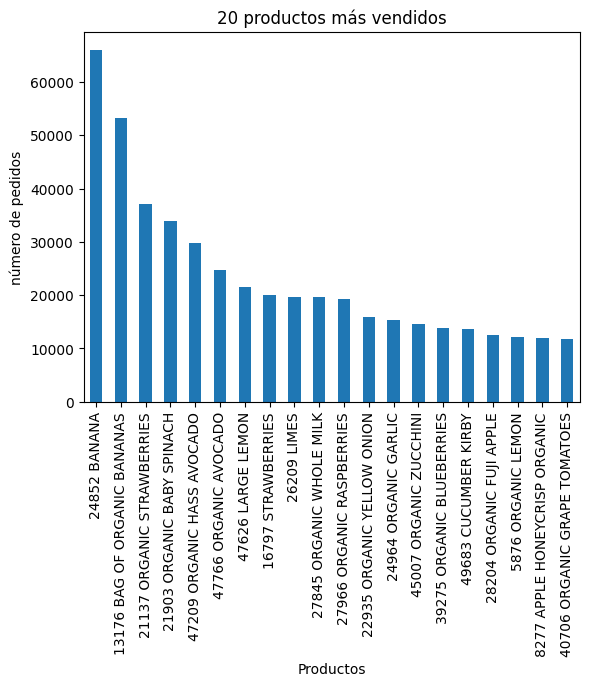

In [86]:
#Graficamos los 20 productos más vendidos
#combinaremos las columnas de nombre y id para visualizarlas juntas en la gráfica
products_descrip['new_colum'] =  products_descrip['product_id'].astype(str) + ' ' + products_descrip['product_name']
products_frecuency = products_descrip.groupby('new_colum').size().sort_values(ascending=False).head(20)
products_frecuency.plot(kind='bar', xlabel='Productos', ylabel='número de pedidos', title= '20 productos más vendidos', rot=90)


In [88]:
#enlistamos los 20 productos más vendidos
print(products_frecuency.head(20))

new_colum
24852 BANANA                     66050
13176 BAG OF ORGANIC BANANAS     53297
21137 ORGANIC STRAWBERRIES       37039
21903 ORGANIC BABY SPINACH       33971
47209 ORGANIC HASS AVOCADO       29773
47766 ORGANIC AVOCADO            24689
47626 LARGE LEMON                21495
16797 STRAWBERRIES               20018
26209 LIMES                      19690
27845 ORGANIC WHOLE MILK         19600
27966 ORGANIC RASPBERRIES        19197
22935 ORGANIC YELLOW ONION       15898
24964 ORGANIC GARLIC             15292
45007 ORGANIC ZUCCHINI           14584
39275 ORGANIC BLUEBERRIES        13879
49683 CUCUMBER KIRBY             13675
28204 ORGANIC FUJI APPLE         12544
5876 ORGANIC LEMON               12232
8277 APPLE HONEYCRISP ORGANIC    11993
40706 ORGANIC GRAPE TOMATOES     11781
dtype: int64


Los productos más vendidos son frutas y verduras, en especial aquellas con la etiqueta de orgánicos.

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [89]:
products_per_order = order_products.groupby('order_id')['product_id'].count()
print(products_per_order.mean())

10.098983215049127


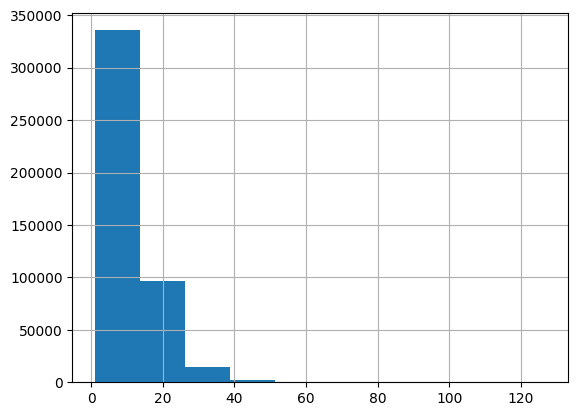

In [90]:

products_per_order.hist()
plt.show()

La mayoría de las personas piden al rededor de 10 productos

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [91]:
#iniciamos agrupando y reseteando el indice d enuestro nuevo data frame
reorder_frec = order_products.groupby('product_id')['reordered'].sum().reset_index()
reorder_frec = reorder_frec.sort_values(by='reordered', ascending=False).head(20) #ordenamos los pedidos mas frecuentes
reorder_frec_det = pd.merge(reorder_frec, products[['product_id', 'product_name']], on='product_id') #se unen las dos tablas por el id de producto
reorder_frec_det[['product_id', 'product_name', 'reordered']] #imprimimos el nuevo data frame

,product_id,product_name,reordered
0,24852,BANANA,55763
1,13176,BAG OF ORGANIC BANANAS,44450
2,21137,ORGANIC STRAWBERRIES,28639
3,21903,ORGANIC BABY SPINACH,26233
4,47209,ORGANIC HASS AVOCADO,23629
5,47766,ORGANIC AVOCADO,18743
6,27845,ORGANIC WHOLE MILK,16251
7,47626,LARGE LEMON,15044
8,27966,ORGANIC RASPBERRIES,14748
9,16797,STRAWBERRIES,13945


In [92]:
### Los 20 productos que se ordenan y vuelven a pedir con mayor frecuencia son frutos y verduras, al igual que productos orgánicos.

<Axes: title={'center': '20 productos que se reordenan con mayor frecuencia'}, xlabel='productos', ylabel='Numero de vueltos a pedir'>

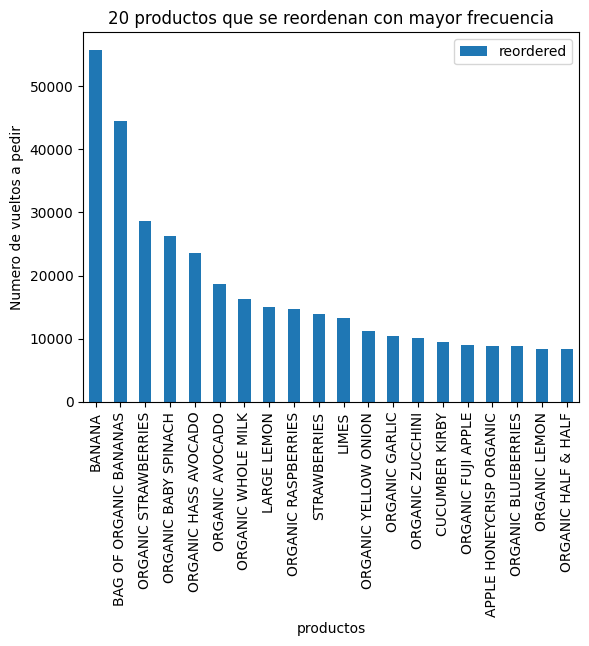

In [93]:
reorder_frec_det.plot(kind='bar', x='product_name', y='reordered', xlabel='productos', ylabel= 'Numero de vueltos a pedir', title='20 productos que se reordenan con mayor frecuencia', rot=90)

Los productos que se ordenan con mayor frecuencia son los productos orgánicos.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [94]:
reorder_frec = order_products.groupby('product_id')['reordered'].mean()
print(reorder_frec)
print(reorder_frec.mean())

product_id
1        0.564286
2        0.000000
3        0.738095
4        0.510204
7        0.500000
           ...   
49690    0.800000
49691    0.430556
49692    0.416667
49693    0.440000
49694    0.333333
Name: reordered, Length: 45573, dtype: float64
0.38670677893645


Los productos más pedidos son igualmente los que se reordenan con mayor frecuencia por los clientes.

In [95]:
#modificado, gracias

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [96]:
#unimos las columnas que necesitamos
prop_product = pd.merge(orders[['order_id', 'user_id']], order_products[['order_id', 'reordered']], on='order_id')
prop_prev = prop_product.groupby('user_id')['reordered'].mean() #agrupamos y promediamos la cantidad que reordenó cada cliente
print(prop_prev)
print(prop_prev.mean())

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64
0.4948531736151642


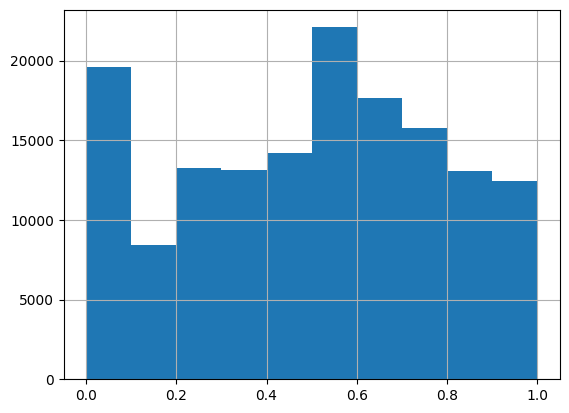

In [97]:
prop_prev.hist()
plt.show()



el 49% de los productos ya habian sido pedidos por los clientes anteriormente, la gráfica muestra el comportamiento en general de los pedidos hechos previamente.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [98]:
#unimos las columnas necesarias
first_product = pd.merge(products, order_products, on='product_id')


In [99]:
#filtramos los primeros productos en el carrito
first_product_filt = first_product[first_product['add_to_cart_order']==1]


In [100]:
#agrupamos e imprimimos
count_first = first_product_filt.groupby('product_name')['add_to_cart_order'].value_counts().sort_values(ascending=False).head(20)

print(count_first)

product_name                 add_to_cart_order
BANANA                       1                    15562
BAG OF ORGANIC BANANAS       1                    11026
ORGANIC WHOLE MILK           1                     4363
ORGANIC STRAWBERRIES         1                     3946
ORGANIC HASS AVOCADO         1                     3390
ORGANIC BABY SPINACH         1                     3336
ORGANIC AVOCADO              1                     3044
SPRING WATER                 1                     2336
STRAWBERRIES                 1                     2308
ORGANIC RASPBERRIES          1                     2024
SPARKLING WATER GRAPEFRUIT   1                     1914
ORGANIC HALF & HALF          1                     1797
LARGE LEMON                  1                     1737
SODA                         1                     1733
ORGANIC REDUCED FAT MILK     1                     1397
LIMES                        1                     1370
HASS AVOCADOS                1                     1340
O

<Axes: title={'center': '20 productos que compran primero los clientes'}, xlabel='productos', ylabel='Orden de compra'>

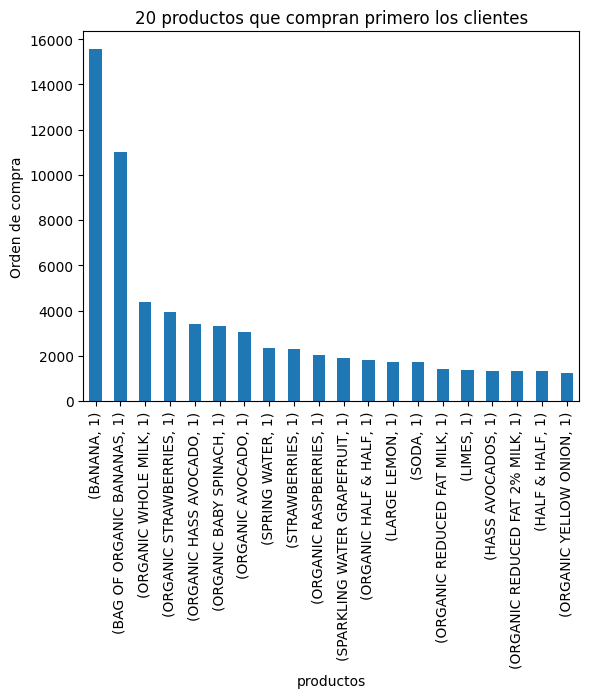

In [101]:
count_first.plot(kind='bar', x='product_name', y='add_to_cart_order', xlabel='productos', ylabel= 'Orden de compra', title='20 productos que compran primero los clientes', rot=90)

Los 20 productos que ordenan primero los clientes coinciden en su mayoría con los 20 procutos más vendidos y los más reordenados.

### Conclusion general del proyecto:

Al trabajar con diferentes data frames que comparten información, es posible hacer multiples análisis al manipular los datos. Para ello primeramente se deben procesar para filtrar aquellos datos que no son representativos como los duplicados y ausentes. Las gráficas son muy utiles al momento de visualizar datos, pero puede ser confuso el acomodo de los mismos ya que se debe elegir el tipo de gráfico adecuado para cada caso.

La plataforma de Instacar ha permitido duplicar información e ingresar datos ausentes, lo que puede interferir al momento de analizar sus pedidos. Los clientes tienden a ordenar más en horas del día entre 9:00 y 17:00, siendo los domingos el día favorito. La mayoría de los clientes hacen su compra semanalmente. Las bananas, fresas, baby spinach y aguacates lideran las listas de compras.